# Utilities

In [1]:
# Requires extra package:
#! sage -pip install "pseudowalls==0.0.3" --extra-index-url https://gitlab.com/api/v4/projects/43962374/packages/pypi/simple
%display latex

from pseudowalls import *

Δ = lambda v: v.Q_tilt()
mu = stability.Mumford().slope
ts = stability.Tilt

var("beta", domain="real")

def beta_minus(v):
    beta = stability.Tilt().beta
    solutions = solve(
        stability.Tilt(alpha=0).degree(v)==0,
        beta)
    return min(map(lambda s: s.rhs(), solutions))

class Object(object):
    pass

# Characteristic Curves Plots

In [2]:
def charact_curves(v):
    alpha = stability.Tilt().alpha
    beta = stability.Tilt().beta
    coords_range = (beta, -4, 5), (alpha, 0, 4)
    text_args = {"fontsize":"xx-large", "clip":True}
    black_text_args = {"rgbcolor": "black", **text_args}
    p = (
        implicit_plot(stability.Tilt().degree(v), *coords_range )
        + line([(mu(v),0),(mu(v),5)], linestyle = "dashed")
        + text(r"$\Theta_v^+$",[3.5, 2], rotation=45, **text_args)
        + text(r"$V_v$", [0.43, 1.5], rotation=90, **text_args)
        + text(r"$\Theta_v^-$", [-2.2, 2], rotation=-45, **text_args)
        + text(r"$\nu_{\alpha, \beta}(v)>0$", [-3, 1], **black_text_args)
        + text(r"$\nu_{\alpha, \beta}(v)<0$", [-1, 3], **black_text_args)
        + text(r"$\nu_{\alpha, \beta}(-v)>0$", [2, 3], **black_text_args)
        + text(r"$\nu_{\alpha, \beta}(-v)<0$", [4, 1], **black_text_args)
    )
    p.xmax(5)
    p.xmin(-4)
    p.ymax(4)
    p.axes_labels([r"$\beta$", r"$\alpha$"])
    return p

v1 = Chern_Char(3, 2, -2)
v2 = Chern_Char(3, 2, 2/3)

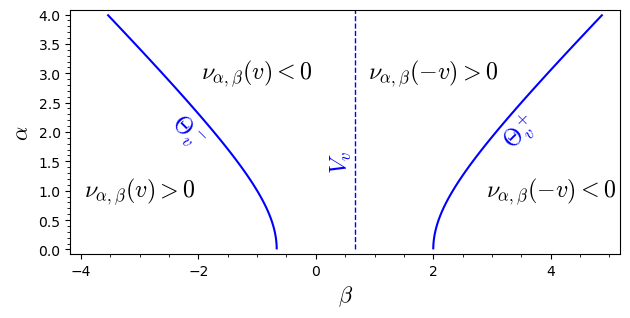

In [3]:
typical_characteristic_curves = charact_curves(v1)
typical_characteristic_curves

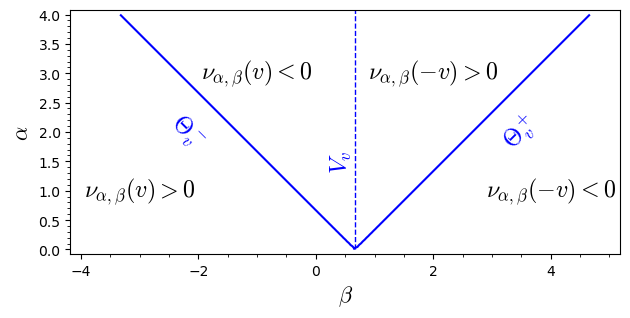

In [4]:
degenerate_characteristic_curves = charact_curves(v2)
degenerate_characteristic_curves

## Characteristic Curves for Pseudo-semistabilizers

In [5]:
def hyperbola_intersection_plot():
    var("alpha beta", domain="real")
    coords_range = (beta, -3, -1/2), (alpha, 0, 2.5)
    delta1 = -sqrt(2)+1/100
    delta2 = 1/2
    pbeta=-1.5
    text_args = {"fontsize":"large", "clip":True}
    black_text_args = {"rgbcolor":"black", **text_args}
    p = (
        implicit_plot( beta^2 - alpha^2 == 2,
            *coords_range , rgbcolor = "black", legend_label=r"a")
        + implicit_plot( (beta+4)^2 - (alpha)^2 == 2,
            *coords_range , rgbcolor = "red")
        + implicit_plot( (beta+delta1)^2 - alpha^2 == (delta1-2)^2-2,
            *coords_range , rgbcolor = "blue")
        + implicit_plot( (beta+delta2)^2 - alpha^2 == (delta2-2)^2-2,
            *coords_range , rgbcolor = "green")
        + point([-2, sqrt(2)], size=50, rgbcolor="black", zorder=50)
        + text("Q",[-2, sqrt(2)+0.1], **black_text_args)
        + point([pbeta, sqrt(pbeta^2-2)], size=50, rgbcolor="black", zorder=50)
        + text("P",[pbeta+0.1, sqrt(pbeta^2-2)], **black_text_args)
        + circle((-2,0),sqrt(2), linestyle="dashed", rgbcolor="purple")
        # dummy lines to add legends (circumvent bug in implicit_plot)
        + line([(2,0),(2,0)] , rgbcolor = "purple", linestyle="dotted",
            legend_label=r"pseudo-wall")
        + line([(2,0),(2,0)] , rgbcolor = "black",
            legend_label=r"$\Theta_v^-$")
        + line([(2,0),(2,0)] , rgbcolor = "red", legend_label=r"$\Theta_u$ case 1")
        + line([(2,0),(2,0)] , rgbcolor = "blue", legend_label=r"$\Theta_u$ case 2")
        + line([(2,0),(2,0)] , rgbcolor = "green", legend_label=r"$\Theta_u$ case 3")
    )
    p.set_legend_options(loc="upper right", font_size="x-large",
        font_family="serif")
    p.xmax(coords_range[0][2])
    p.xmin(coords_range[0][1])
    p.ymax(coords_range[1][2])
    p.ymin(coords_range[1][1])
    p.axes_labels([r"$\beta$", r"$\alpha$"])
    return p

Considering the 3 different ways that $\Theta_u$ could intersect $\Theta_v^-$

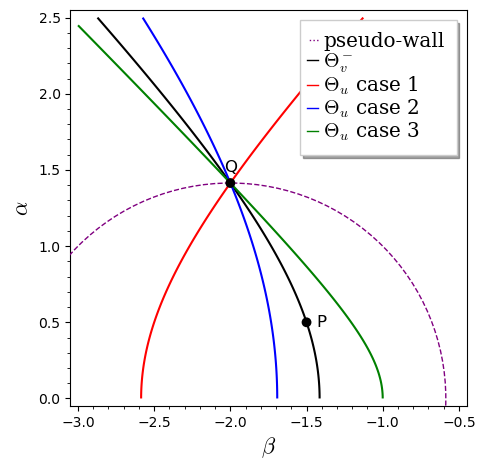

In [6]:
hyperbola_intersection_plot()

In [7]:
def correct_hyperbola_intersection_plot():
    var("alpha beta", domain="real")
    coords_range = (beta, -2.5, 0.5), (alpha, 0, 3)
    delta2 = 1/2
    pbeta=-1.5
    text_args = {"fontsize":"large", "clip":True}
    black_text_args = {"rgbcolor":"black", **text_args}
    p = (
        implicit_plot( beta^2 - alpha^2 == 2,
            *coords_range , rgbcolor = "black", legend_label=r"a")
        + implicit_plot((beta+delta2)^2 - alpha^2 == (delta2-2)^2-2,
            *coords_range , rgbcolor = "green")
        + point([-2, sqrt(2)], size=50, rgbcolor="black", zorder=50)
        + text("Q",[-2, sqrt(2)+0.1], **black_text_args)
        + point([pbeta, sqrt(pbeta^2-2)], size=50, rgbcolor="black", zorder=50)
        + text("P",[pbeta+0.1, sqrt(pbeta^2-2)], **black_text_args)
        + circle((-2,0),sqrt(2), linestyle="dashed", rgbcolor="purple")
        # dummy lines to add legends (circumvent bug in implicit_plot)
        + line([(2,0),(2,0)] , rgbcolor = "purple", linestyle="dotted",
            legend_label=r"pseudo-wall")
        + line([(2,0),(2,0)] , rgbcolor = "black",
            legend_label=r"$\Theta_v^-$")
        + line([(2,0),(2,0)] , rgbcolor = "green",
            legend_label=r"$\Theta_u^-$")
        # vertical characteristic lines
        + line([(0,0),(0,coords_range[1][2])],
            rgbcolor="black", linestyle="dashed",
            legend_label=r"$V_v$")
        + line([(-delta2,0),(-delta2,coords_range[1][2])],
            rgbcolor="green", linestyle="dashed",
            legend_label=r"$V_u$")
        + line([(-delta2,0),(-delta2-coords_range[1][2],coords_range[1][2])],
            rgbcolor="green", linestyle="dotted",
            legend_label=r"$\Theta_u^-$ assymptote")
        + line([(0,0),(-coords_range[1][2],coords_range[1][2])],
            rgbcolor="black", linestyle="dotted",
            legend_label=r"$\Theta_v^-$ assymptote")
    )
    p.set_legend_options(loc="upper right", font_size="x-large",
        font_family="serif")
    p.xmax(coords_range[0][2])
    p.xmin(coords_range[0][1])
    p.ymax(coords_range[1][2])
    p.ymin(coords_range[1][1])
    p.axes_labels([r"$\beta$", r"$\alpha$"])
    return p

Full picture of characteristic curves, assymptotes, pseudo-walls for the scenario described in main problem (object $u$ destabilizing $v$ going down $\Theta_v^-$ before reaching some point $P$)

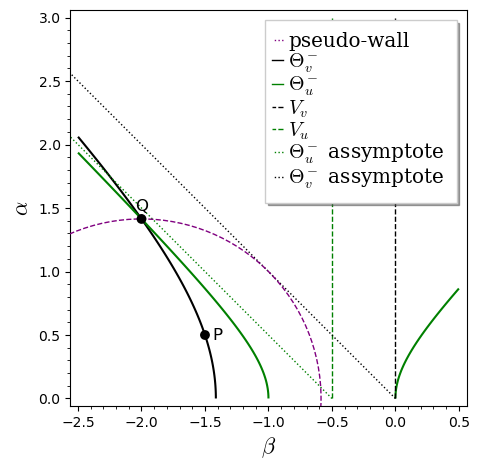

In [8]:
correct_hyperbola_intersection_plot()